## Cardiac Arrhythmia

The Electrocardiogram (ECG) is a technique in cardiology for the analysis of cardiac condition of the patients. In its basic definition, ECG is the electrical representation of the contractile activity of the heart, and can be recorded fairly easily by using surface electrodes on the limbs or chest of the patient. The ECG is one of the most recognized and used biomedical signal in the field of medicine. The rhythm of the heart in terms of beats per minute (bpm) can be easily calculated by counting the R peaks of the ECG wave during one minute of recording. More importantly, rhythm and the morphology of the ECG waveform is altered by cardiovascular diseases and abnormalities such as the cardiac arrhythmias, which their automatic detection and classification is the main focus of this study.

The aim of this project is to distinguish between the presence and absence of cardiac arrhythmia.

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn import metrics

In [284]:
del(df)
df = pd.read_csv(r'C:\Users\mnmus\Downloads\data_arrhythmia.csv',';')
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [263]:
df.tail()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0,0.5,1.6,21.3,32.8,1


In [264]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to diagnosis
dtypes: float64(116), int64(159), object(5)
memory usage: 988.9+ KB


In [265]:
df = df.replace('?', np.NaN)
#df.isnull().count()
#df.isnull()

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to diagnosis
dtypes: float64(116), int64(159), object(5)
memory usage: 988.9+ KB


In [267]:
df.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
age,452.0,46.471239,16.466631,0.0,36.0,47.0,58.0,83.0
sex,452.0,0.550885,0.497955,0.0,0.0,1.0,1.0,1.0
height,452.0,166.188053,37.170340,105.0,160.0,164.0,170.0,780.0
weight,452.0,68.170354,16.590803,6.0,59.0,68.0,79.0,176.0
qrs_duration,452.0,88.920354,15.364394,55.0,80.0,86.0,94.0,188.0


Text(0, 0.5, 'Count of NaN')

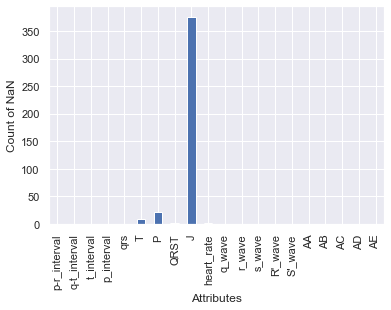

In [268]:
pd.isnull(df).sum()[5:25].plot(kind='bar')
plt.xlabel('Attributes')
plt.ylabel('Count of NaN')

In [269]:
df.isnull().sum().sum()

408

In [270]:
df.columns

Index(['age', 'sex', 'height', 'weight', 'qrs_duration', 'p-r_interval',
       'q-t_interval', 't_interval', 'p_interval', 'qrs',
       ...
       'KY', 'KZ', 'LA', 'LB', 'LC', 'LD', 'LE', 'LF', 'LG', 'diagnosis'],
      dtype='object', length=280)

In [271]:
df.iloc[:,12]
[(df.isnull().sum())>0]
#(kt>0).any()


[age             False
 sex             False
 height          False
 weight          False
 qrs_duration    False
                 ...  
 LD              False
 LE              False
 LF              False
 LG              False
 diagnosis       False
 Length: 280, dtype: bool]

In [272]:
#plt.plot(df.isnull().sum())
df[df.columns[df.isnull().any()]]
df['T'].isnull().sum()
df[df.columns[df.isnull().any()]].isnull().sum()
#df[df.columns[df.isna().any()]].isnull.sum()

T               8
P              22
QRST            1
J             376
heart_rate      1
dtype: int64

In [273]:
nan_values = df[df.columns[df.isna().any()]]

print (nan_values)

       T    P QRST    J heart_rate
0     13   64   -2  NaN         63
1     37  -17   31  NaN         53
2     34   70   66   23         75
3     11   -5   20  NaN         71
4     13   61    3  NaN        NaN
..   ...  ...  ...  ...        ...
447    4   40  -27  NaN         63
448   66   52   79  NaN         73
449  -19  -61  -70   84         84
450   29  -22   43  103         80
451   79   52   47  NaN         75

[452 rows x 5 columns]


In [274]:
df.drop('J', inplace=True,axis=1)


In [275]:
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [276]:
from fancyimpute import KNN
knn_imputer=KNN()
df_processed =knn_imputer.fit_transform(df)

Imputing row 1/452 with 0 missing, elapsed time: 0.159
Imputing row 101/452 with 0 missing, elapsed time: 0.159
Imputing row 201/452 with 1 missing, elapsed time: 0.159
Imputing row 301/452 with 1 missing, elapsed time: 0.159
Imputing row 401/452 with 0 missing, elapsed time: 0.174


In [280]:
df_processed=pd.DataFrame(df_processed)
X = df_processed.drop(columns = 278)
X.head()


,0,1,2,3,4,5,6,7,8,9,...,268,269,270,271,272,273,274,275,276,277
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8


In [281]:
X_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279"]

In [282]:
X.columns = X_columns
X.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8


In [297]:
y = df.iloc[:,279]
y.head()
y.columns = ["Class"]
y.head()

0     8
1     6
2    10
3     1
4     7
Name: diagnosis, dtype: int64

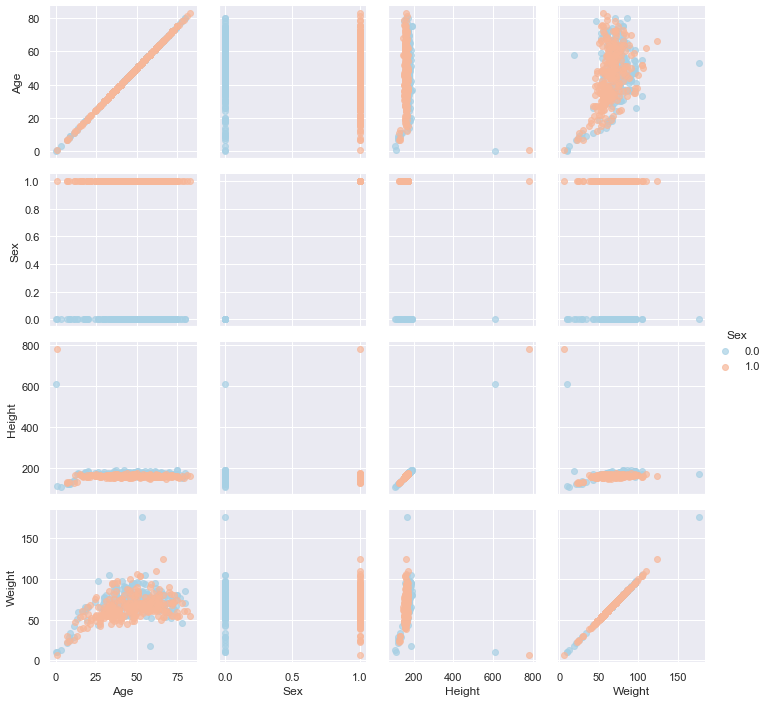

In [296]:
g = sns.PairGrid(X, vars=['Age', 'Sex', 'Height', 'Weight'],
                 hue='Sex', palette='RdBu_r')
g.map(plt.scatter, alpha=0.7)
g.add_legend();

There are few outliers in 'height' and 'weight' attributes. I'll check the maximums of heights and weights

In [298]:
sorted(X['Height'], reverse=True)[:10]

[780.0, 608.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]

The tallest person ever lived in the world was 272 cm (1940). His followers were 267 cm(1905) and 263.5 cm(1969)

Replacing 780 and 608 with 108 and 180 cm



In [299]:
X['Height']=X['Height'].replace(608,108)
X['Height']=X['Height'].replace(780,180)

In [300]:
sorted(X['Weight'], reverse=True)[:10]

[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]

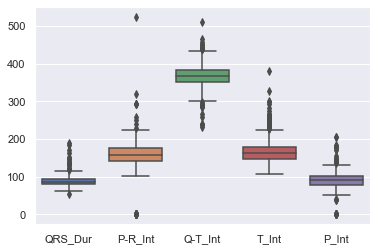

In [301]:
sns.boxplot(data=X[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);

PR interval is the period, measured in milliseconds, that extends from the beginning of the P wave until the beginning of the QRS complex; it is normally between 120 and 200ms in duration.

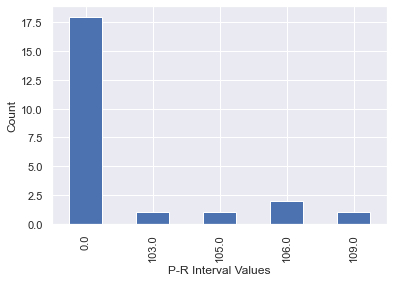

In [303]:
X['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

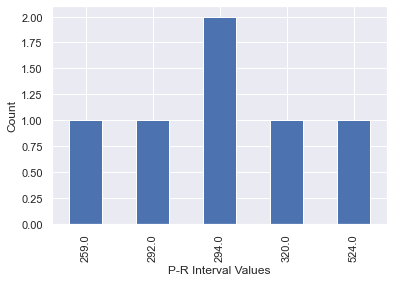

In [304]:
X['P-R_Int'].value_counts().sort_index().tail().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

PR Interval data is including outliers 0(x18). I'll keep them
QT interval is a measure of the time between the start of the Q wave and the end of the T wave in the heart's electrical cycle. The outlier data appearing in Q-T Interval box might be related to the outlier of T-interval dat

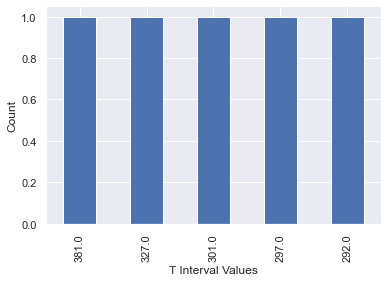

In [305]:
X['T_Int'].value_counts().sort_index(ascending=False).head().plot(kind='bar')
plt.xlabel('T Interval Values')
plt.ylabel('Count');

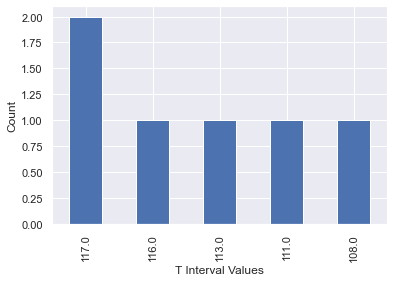

In [306]:
X['T_Int'].value_counts().sort_index(ascending=False).tail().plot(kind='bar')
plt.xlabel('T Interval Values')
plt.ylabel('Count');

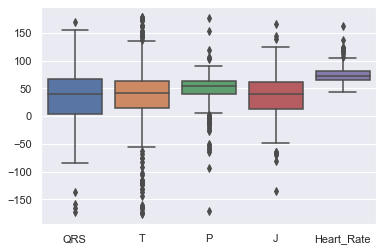

In [307]:
sns.boxplot(data=X[["QRS","T","P","J","Heart_Rate"]]);

<AxesSubplot:>

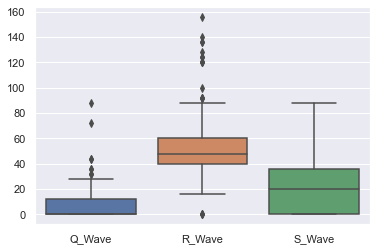

In [308]:
sns.boxplot(data=X[["Q_Wave","R_Wave","S_Wave"]])

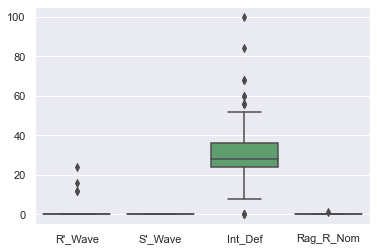

In [309]:
sns.boxplot(data=X[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]]);

In [310]:
X["R'_Wave"].value_counts().sort_index(ascending=False)

24.0      1
16.0      1
12.0      2
0.0     448
Name: R'_Wave, dtype: int64

In [312]:
X["S'_Wave"].value_counts().sort_index(ascending=False)

0.0    452
Name: S'_Wave, dtype: int64

In [313]:
X["Rag_R_Nom"].value_counts().sort_index(ascending=False)

1.0      1
0.0    451
Name: Rag_R_Nom, dtype: int64

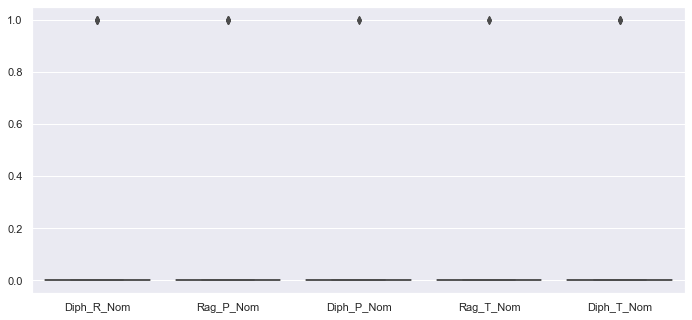

In [314]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom"]]);

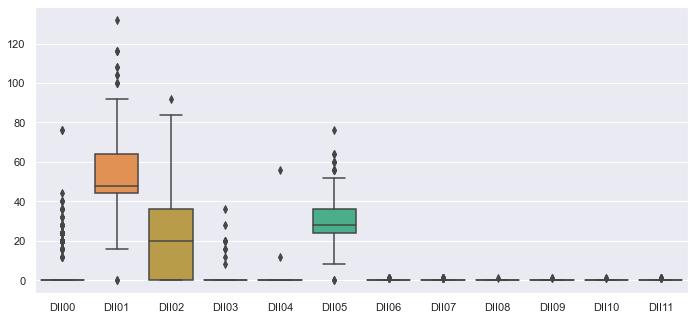

In [315]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11"]]);

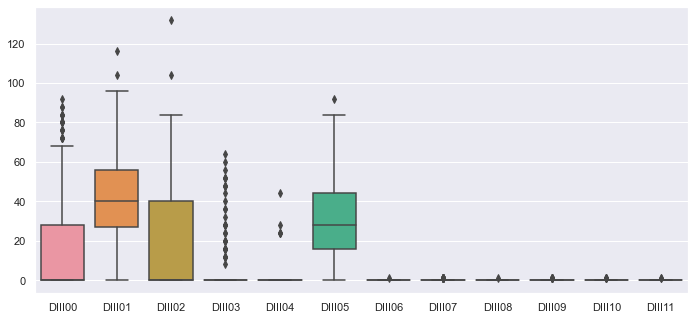

In [316]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06",
                       "DIII07","DIII08","DIII09","DIII10","DIII11"]]);

In [317]:
X["V101"].value_counts().sort_index(ascending=False)

216.0     1
112.0     1
84.0      1
72.0      1
68.0      1
64.0      1
48.0      6
44.0      6
40.0     13
36.0     36
32.0     63
28.0     81
24.0     88
20.0     57
16.0     13
12.0      4
0.0      79
Name: V101, dtype: int64

V101 has an outlier, but when we look at other sets (V201, V301, V501) we can see that there's an outlier similarly. Since our data is heavily biased, I can't say these outliers should be dropped.

For example, when we look at our data, we can see that class # 8 (Supraventricular Premature Contraction) has only 2 instances. Or # 3 (Ventricular Premature Contraction (PVC)) has only 3. The outliers appearing with our plots might belong to these instances and needs to be kept.

Train Test Split

In [318]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 10)

In [319]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choosing ML Models and metrics

Thinking about the classification evaluation metrics, the importance of my models' precitions (I can't accept a result having the probability of saying to a healty person that you have Cardiac Arrhythmia (FN)).

I definitely will focus on Sensitivity (the percentage of sick people who are correctly identified as having the condition) not Specificity (percentage of healthy people who are correctly identified as not having the condition).

image.png

So, I'll use recall for my models and sklearn has a "weighted" metric which accounts for class imbalance by computing the average of metrics in which each class’s score is weighted by its presence in the true data sample.

In [325]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()

param_grid = {'n_neighbors' : [1,2,3,4,5,7,10]}

grid_search = GridSearchCV (knn_clf, param_grid, cv=kFold,scoring = 'recall_weighted', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 10]},
             return_train_score=True, scoring='recall_weighted')

In [326]:
grid_search.best_params_

{'n_neighbors': 2}

In [327]:
grid_search.best_score_

0.5937457279562542

In [328]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [329]:
y_pred_train = knn_clf.predict(X_train)
y_pred_test = knn_clf.predict(X_test)

knn_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
knn_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(knn_train_recall_score))
print('Test Recall score: {}'
      .format(knn_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.6692708333333334
Test Recall score: 0.6470588235294118


array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

# Logistic Regression

In [333]:
from sklearn.linear_model import LogisticRegression

lreg_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')

param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.05,0.1,1,10,100]}

grid_search = GridSearchCV(lreg_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 1, 10,
                               100]},
             return_train_score=True, scoring='recall_weighted')

In [334]:
grid_search.best_params_

{'C': 1}

In [335]:
grid_search.best_score_

0.7005468215994531

In [336]:
lreg_clf= LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1)
lreg_clf.fit(X_train, y_train)

LogisticRegression(C=1, multi_class='multinomial')

In [339]:
y_pred_train = lreg_clf.predict(X_train)
y_pred_test = lreg_clf.predict(X_test)

lreg_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
lreg_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')
print('Train Recall score: {}'
      .format(lreg_train_recall_score))
print('Test Recall score: {}'
      .format(lreg_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8411458333333334
Test Recall score: 0.6764705882352942


array([[37,  1,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

The large difference between train and test scores showing that the model is overfitting and low test score is also showing that Logistic Regression doesn't perform well.

## Linear SVM

In [342]:
from sklearn.svm import LinearSVC

LSVC_clf = LinearSVC(multi_class='crammer_singer')

param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(LSVC_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LinearSVC(multi_class='crammer_singer'),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='recall_weighted')

In [343]:
grid_search.best_params_

{'C': 1}

In [344]:
grid_search.best_score_

0.7032125768967875

In [345]:
LSVC_clf = LinearSVC(multi_class='crammer_singer', C=0.1)
LSVC_clf.fit(X_train, y_train)

LinearSVC(C=0.1, multi_class='crammer_singer')

In [346]:
y_pred_train = LSVC_clf.predict(X_train)
y_pred_test = LSVC_clf.predict(X_test)

lsvc_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
lsvc_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(lsvc_train_recall_score))
print('Test Recall score: {}'
      .format(lsvc_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.7838541666666666
Test Recall score: 0.7205882352941176


array([[39,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

Test score is better than KNN and Logistic Regression. Also model is good fit as there is not much difference between train and test score.

### Kernelized SVM

In [347]:
from sklearn import svm

KSVC_clf = svm.SVC(kernel='rbf')

param_grid = {'C': [0.0001,0.001,0.01,0.1,1,10],
          'gamma': [0.0001,0.001,0.01,0.1,1,10]}

grid_search = GridSearchCV(KSVC_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True, scoring='recall_weighted')

In [348]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [349]:
grid_search.best_score_

0.7109706083390295

In [350]:
KSVC_clf = svm.SVC(kernel='rbf',C=10,gamma=0.1)

KSVC_clf.fit(X_train, y_train)

SVC(C=10, gamma=0.1)

In [351]:
y_pred_train = KSVC_clf.predict(X_train)
y_pred_test = KSVC_clf.predict(X_test)

ksvc_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
ksvc_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(ksvc_train_recall_score))
print('Test Recall score: {}'
      .format(ksvc_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.9765625
Test Recall score: 0.6764705882352942


array([[35,  1,  0,  0,  0,  3,  0,  1,  0,  0,  0],
       [ 2,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

We can see that test score is poor and Kernalised SVM doesn't perform well. Also model is overfitting as there is large difference between train and test score.

Naive Bayes

In [352]:
from sklearn.naive_bayes import MultinomialNB

mnb_clf = MultinomialNB()
param_grid = {'alpha':[0,1.0,10], 'fit_prior':(True, False)}

grid_search = GridSearchCV(mnb_clf, param_grid,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0, 1.0, 10], 'fit_prior': (True, False)})

In [353]:
grid_search.best_params_

{'alpha': 1.0, 'fit_prior': False}

In [354]:
grid_search.best_score_

0.6093984962406015

In [355]:
mnb_clf = MultinomialNB(alpha=0, fit_prior=True)

mnb_clf.fit(X_train, y_train)

MultinomialNB(alpha=0)

In [356]:
y_pred_train = mnb_clf.predict(X_train)
y_pred_test = mnb_clf.predict(X_test)

mnb_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
mnb_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(mnb_train_recall_score))
print('Test Recall score: {}'
      .format(mnb_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.7604166666666666
Test Recall score: 0.6323529411764706


array([[35,  0,  0,  0,  1,  1,  0,  2,  0,  0,  1],
       [ 3,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

### Decision Tree

In [357]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [2, 3, 4, 5,6, 10, 20]}

grid_search = GridSearchCV(dt_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 10, 20]},
             return_train_score=True, scoring='recall_weighted')

In [358]:
grid_search.best_params_

{'max_depth': 6}

In [359]:
grid_search.best_score_

0.6849965823650035

In [360]:
dt_clf = DecisionTreeClassifier(max_depth=6)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [361]:
y_pred_train = dt_clf.predict(X_train)
y_pred_test = dt_clf.predict(X_test)

dt_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
dt_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(dt_train_recall_score))
print('Test Recall score: {}'
      .format(dt_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8463541666666666
Test Recall score: 0.7205882352941176


array([[37,  0,  0,  0,  2,  1,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0]], dtype=int64)

Test score is poor and decision tree doesn't perform well. Also model is somewhat overfitting as there is difference between train and test score.

### Random Forest

In [365]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',n_jobs= -1,random_state=10)

param_grid = {'max_features': [100,125,150,200],
          'max_depth': [6,8,10,12,14],
           'max_leaf_nodes':[20,22,30,50]}

grid_search = GridSearchCV(rf_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(n_estimators=300, n_jobs=-1,
                                              random_state=10),
             param_grid={'max_depth': [6, 8, 10, 12, 14],
                         'max_features': [100, 125, 150, 200],
                         'max_leaf_nodes': [20, 22, 30, 50]},
             return_train_score=True, scoring='recall_weighted')

In [366]:
grid_search.best_params_


{'max_depth': 14, 'max_features': 125, 'max_leaf_nodes': 50}

In [367]:
grid_search.best_score_

0.7656869446343132

In [376]:
rf_clf = RandomForestClassifier(n_estimators=1000, criterion='gini',max_features=100,max_depth=10,max_leaf_nodes=30)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=100, max_leaf_nodes=30,
                       n_estimators=1000)

In [377]:
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

rf_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
rf_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(rf_train_recall_score))
print('Test Recall score: {}'
      .format(rf_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.9348958333333334
Test Recall score: 0.7647058823529411


array([[37,  1,  0,  0,  1,  1,  0,  0,  0,  0,  0],
       [ 1,  2,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

###  Test score is good and Random forest performs well as it is ensemble method. But model is overfitting as there is large difference between train and test score.

### AdBoosting with Random Forest

In [389]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(base_estimator = rf_clf, learning_rate = 0.5)
adaboost_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test, y_test)))

Train score: 0.99
Test score: 0.71


### Adaptive boosting did in fact raise the average training accuracy for the Decision Tree but the test accuracy got reduced. It is still overfitting

### Ensable Classifier

In [378]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

hard_voting_clf = VotingClassifier(estimators=[('knn', knn_clf),('lr',lreg_clf),('lsvc', LSVC_clf),
                                   ('ksvc', KSVC_clf),('dt', dt_clf), ('rt', rf_clf)],voting = 'hard')
hard_voting_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(hard_voting_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(hard_voting_clf.score(X_test, y_test)))

Train score: 0.85
Test score: 0.69


In [380]:
score = cross_val_score(estimator=hard_voting_clf,X=X_train,y=y_train, scoring='recall_weighted', cv=kFold)

In [381]:
print('Mean Score: {0:0.2f}'.format(score.mean()))
print('Mean Std: {0:0.2f}'.format(score.std()))

Mean Score: 0.70
Mean Std: 0.02


In [382]:
X_scaled = scaler.fit_transform(X)

### Gradient Boosting

In [383]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(learning_rate = 0.05)
gb_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(gb_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(gb_clf.score(X_test, y_test)))

Train score: 1.00
Test score: 0.74


Gradient Boosting is overfitting the model

In [384]:
GB = GradientBoostingClassifier()
score = cross_val_score(estimator=GB, X=X_scaled, y=y, cv=kFold, n_jobs=-1)
gb_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(gb_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(gb_clf.score(X_test, y_test)))
print('Mean Accuracy:', score.mean())

Train score: 1.00
Test score: 0.72
Mean Accuracy: 0.7057875457875458


In [385]:
GB2 = GradientBoostingClassifier(min_samples_leaf=9, learning_rate=0.05, n_estimators=100)
score = cross_val_score(estimator=GB, X=X_scaled, y=y, cv=kFold, n_jobs=-1)
gb_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(gb_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(gb_clf.score(X_test, y_test)))
print('Mean Accuracy:', score.mean())

Train score: 1.00
Test score: 0.72
Mean Accuracy: 0.7013675213675213


Boosting techniques mentioned above are usually effective, most did not do much to improve the models. Due to reasons like imbalanced classes, high dimensionality and lack of observations, we couldn't get an optimal model.

In [387]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100, svd_solver='auto')
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_comb_pca = np.concatenate((X_train_pca, X_test_pca), axis=0)

In [388]:
X_train_pca.shape

(384, 100)

### Linear SVM with PCA

In [399]:
from sklearn.svm import LinearSVC

LSVC_clf = LinearSVC(multi_class='crammer_singer')

param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(LSVC_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LinearSVC(multi_class='crammer_singer'),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='recall_weighted')

In [400]:
grid_search.cv_results_

{'mean_fit_time': array([0.01013083, 0.00520601, 0.01039948, 0.01439486, 0.0203989 ,
        0.07099967, 0.18399906, 0.263799  ]),
 'std_fit_time': array([0.01375979, 0.00039632, 0.00048834, 0.00079638, 0.00049121,
        0.01198218, 0.02257428, 0.04292097]),
 'mean_score_time': array([0.00610271, 0.00100031, 0.00080009, 0.00120006, 0.00140085,
        0.00119953, 0.00140896, 0.00160079]),
 'std_score_time': array([0.0092493 , 0.00063377, 0.00040004, 0.00040014, 0.00080078,
        0.00039933, 0.00079602, 0.00079944]),
 'param_C': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.0001},
  {'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.66233766, 0.64935065, 0.64935065, 0.66233766, 0.72727273,
        0.68831169, 0.66233766, 0.63636364]),
 'spl

In [401]:
grid_search.best_params_

{'C': 1}

In [402]:
grid_search.best_score_

0.7057758031442243

In [403]:
LSVC_clf = LinearSVC(multi_class='crammer_singer', C=0.1)
LSVC_clf.fit(X_train_pca, y_train)

LinearSVC(C=0.1, multi_class='crammer_singer')

In [404]:
y_pred_train = LSVC_clf.predict(X_train_pca)
y_pred_test = LSVC_clf.predict(X_test_pca)

lscvc_pca_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
lscv_pca_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')
print('Train Recall score: {}'
      .format(lscvc_pca_train_recall_score))
print('Test Recall score: {}'
      .format(lscv_pca_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.7760416666666666
Test Recall score: 0.7352941176470589


array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

### Decision Trees with PCA

In [390]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [2, 3, 4, 5,6, 10, 20]}

grid_search = GridSearchCV(dt_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 10, 20]},
             return_train_score=True, scoring='recall_weighted')

In [392]:
grid_search.cv_results_

{'mean_fit_time': array([0.01491733, 0.00943956, 0.00762358, 0.01243525, 0.01515975,
        0.02057662, 0.01397557]),
 'std_fit_time': array([0.01630095, 0.00770797, 0.00651482, 0.01147112, 0.00318198,
        0.00911289, 0.00981137]),
 'mean_score_time': array([0.00477929, 0.00020061, 0.00046859, 0.00061526, 0.00020514,
        0.00040002, 0.00646267]),
 'std_score_time': array([0.00697352, 0.00040121, 0.00058398, 0.000505  , 0.00041027,
        0.00080004, 0.00751662]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 10, 20],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 10},
  {'max_depth': 20}],
 'split0_test_score': array([0.58441558, 0.57142857, 0.57142857, 0.49350649, 0.53246753,
        0.4025974 , 0.4025974 ]),
 'split1_test_score': array([0.55844156, 0.53246753, 0.506493

In [393]:
grid_search.best_params_

{'max_depth': 3}

In [394]:
grid_search.best_score_

0.5651401230348598

In [395]:
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=4)

In [396]:
y_pred_train = dt_clf.predict(X_train_pca)
y_pred_test = dt_clf.predict(X_test_pca)

dt_pca_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
dt_pca_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(dt_pca_train_recall_score))
print('Test Recall score: {}'
      .format(dt_pca_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.6744791666666666
Test Recall score: 0.5588235294117647


array([[37,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

We can see that decision tree performs really bad with PCA. This may be due to information lose due to dimentionality reduction. Also model is also overfitting as there is difference between train and test score.

### Conclusion:
The Results have improved after using PCA. We get the best result using Linear SVC after applying PCA. However, all models show level of overfitting, additional data set is necessary together with the feature analysis.